In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df =  pd.read_csv(r'C:\Users\Kerry\Rich_Global_Condom_Usage_Dataset.csv')
print(df.shape)
df.head()

(550, 15)


,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male vs Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69% Male - 39% Female,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50% Male - 33% Female,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46% Male - 54% Female,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49% Male - 57% Female,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40% Male - 29% Female,Trojan,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  550 non-null    int64  
 1   Country                               550 non-null    object 
 2   Total Sales (Million Units)           550 non-null    int64  
 3   Market Revenue (Million USD)          550 non-null    float64
 4   Government Campaigns                  550 non-null    object 
 5   Awareness Index (0-10)                550 non-null    float64
 6   Most Popular Condom Type              550 non-null    object 
 7   Contraceptive Usage Rate (%)          550 non-null    float64
 8   Teen Pregnancy Rate (per 1000 teens)  550 non-null    float64
 9   HIV Prevention Awareness (%)          550 non-null    float64
 10  Online Sales (%)                      550 non-null    float64
 11  Average Price per C

In [4]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 1000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Male vs Female Purchases (%)',
       'Brand Dominance', 'Sex Education Programs (Yes/No)'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Year                                    0
Country                                 0
Total Sales (Million Units)             0
Market Revenue (Million USD)            0
Government Campaigns                    0
Awareness Index (0-10)                  0
Most Popular Condom Type                0
Contraceptive Usage Rate (%)            0
Teen Pregnancy Rate (per 1000 teens)    0
HIV Prevention Awareness (%)            0
Online Sales (%)                        0
Average Price per Condom (USD)          0
Male vs Female Purchases (%)            0
Brand Dominance                         0
Sex Education Programs (Yes/No)         0
dtype: int64

In [7]:
df.describe()

,Year,Total Sales (Million Units),Market Revenue (Million USD),Awareness Index (0-10),Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD)
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2020.000000,1217.850909,2460.104428,6.248382,54.625527,34.780055,62.049836,36.902309,1.360891
std,3.165156,707.861532,1908.028885,2.393678,22.865826,19.778428,21.341931,19.256040,0.664664
min,2015.000000,51.000000,34.656206,2.010000,15.020000,2.020000,25.070000,5.010000,0.200000
25%,2017.000000,599.750000,947.550178,4.065000,34.775000,17.532500,43.860000,19.565000,0.782500
50%,2020.000000,1160.000000,2002.374241,6.435000,53.920000,34.705000,63.125000,35.505000,1.390000
75%,2023.000000,1846.000000,3593.351620,8.432500,75.747500,50.787500,79.990000,52.917500,1.927500
max,2025.000000,2500.000000,8536.163259,9.980000,94.970000,69.890000,98.840000,69.960000,2.490000


### linear Regression

In [13]:
X = df.iloc[:,[0,2,3,5,7,8,9,10,11]].values
y = df.iloc[:,2].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
r2_score= regressor.score(X_test, y_test)
print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2_score}")

Mean squared error: 8.88991966553801e-25
R-squared score: 1.0


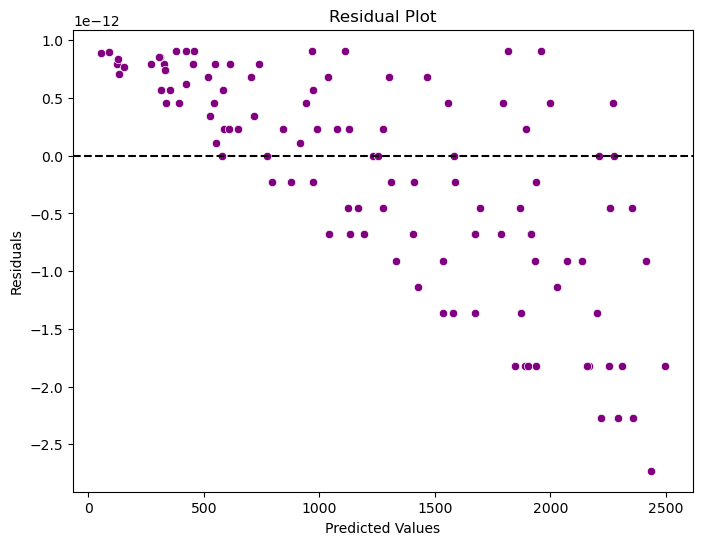

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color="purple")
plt.axhline(y=0, color="black", linestyle="--")  # Zero error line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
